In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('ggplot')
pd.options.display.max_rows = 999

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                 memory   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.289e+04
Date:                Tue, 01 May 2018   Prob (F-statistic):           1.01e-09
Time:                        21:52:24   Log-Likelihood:                 7.6509
No. Observations:                   7   AIC:                            -11.30
Df Residuals:                       5   BIC:                            -11.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1480      0.054  

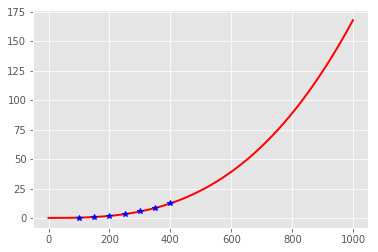

In [30]:
# Fit 1000 models
df = pd.read_csv('./results.csv', sep=';')

exponents = [2.0 + float(x)/1000.0 for x in range(1000)]
results = [smf.ols('memory ~ pow(size,' + str(x) + ')', data=df).fit() for x in exponents]

best_result = results[0]
for result in results:
    if result.rsquared > best_result.rsquared:
        best_result = result


print(best_result.summary())

# Ploting the model and the data means
df_predicted = pd.DataFrame({'size': range(1000)})

df_predicted = sm.add_constant(df_predicted)
df_predicted.loc[:,('predicted_memory')] = best_result.predict(df_predicted)

plt.plot(df_predicted['size'], df_predicted['predicted_memory'], 'r-', linewidth=2)
plt.plot(df['size'], df['memory'], 'b*', linewidth=2)

#axes = plt.gca()
#axes.set_xlim([0.0,1.0])
#axes.set_ylim([0.0,1.0])
plt.show()